In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<b><i style="color:lightgreen">Tasks to be performed with the dataset:</i></b>
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [190]:
df = pd.read_csv("HR_analytics.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<b style="color:lightgreen"><i>Exploring the data</i></b>

In [191]:
df.shape

(14999, 10)

In [192]:
left = df[df.left == 1]
left.shape

(3571, 10)

In [193]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [194]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [195]:
pd.crosstab(df.salary,df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


<AxesSubplot:xlabel='salary'>

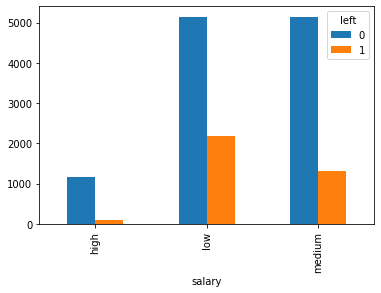

In [196]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [197]:
pd.crosstab(df.Department, df.left)

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<AxesSubplot:ylabel='Department'>

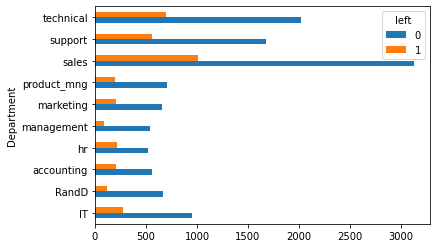

In [198]:
pd.crosstab(df.Department, df.left).plot(kind='barh')

<b style="color:lightgreen"><i>Conclusions from the data exploration: </i></b>
</br>
<p>
Whether an employee is leaveing or retained in the company is mainly depending on the following factors:</br>
1. satisfaction_level</br>
2. average_monthly_hours</br>
3. Work_accident</br>
4. promotion_last_5years</br>
5. salary
</p>

In [199]:
X=df[['satisfaction_level','average_montly_hours','promotion_last_5years', 'Work_accident','salary']]
X

,satisfaction_level,average_montly_hours,promotion_last_5years,Work_accident,salary
0,0.38,157,0,0,low
1,0.80,262,0,0,medium
2,0.11,272,0,0,medium
3,0.72,223,0,0,low
4,0.37,159,0,0,low
...,...,...,...,...,...
14994,0.40,151,0,0,low
14995,0.37,160,0,0,low
14996,0.37,143,0,0,low
14997,0.11,280,0,0,low


In [200]:
dummies = pd.get_dummies(X.salary, prefix='salary', prefix_sep='_')
dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [201]:
X = pd.concat([X,dummies], axis=1)
X

,satisfaction_level,average_montly_hours,promotion_last_5years,Work_accident,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,0,low,0,1,0
1,0.80,262,0,0,medium,0,0,1
2,0.11,272,0,0,medium,0,0,1
3,0.72,223,0,0,low,0,1,0
4,0.37,159,0,0,low,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,151,0,0,low,0,1,0
14995,0.37,160,0,0,low,0,1,0
14996,0.37,143,0,0,low,0,1,0
14997,0.11,280,0,0,low,0,1,0


In [202]:
X = X.drop(['salary', 'salary_medium'], axis='columns')
X

,satisfaction_level,average_montly_hours,promotion_last_5years,Work_accident,salary_high,salary_low
0,0.38,157,0,0,0,1
1,0.80,262,0,0,0,0
2,0.11,272,0,0,0,0
3,0.72,223,0,0,0,1
4,0.37,159,0,0,0,1
...,...,...,...,...,...,...
14994,0.40,151,0,0,0,1
14995,0.37,160,0,0,0,1
14996,0.37,143,0,0,0,1
14997,0.11,280,0,0,0,1


In [203]:
X=X.values
X

array([[3.80e-01, 1.57e+02, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00],
       [8.00e-01, 2.62e+02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.10e-01, 2.72e+02, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [3.70e-01, 1.43e+02, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00],
       [1.10e-01, 2.80e+02, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00],
       [3.70e-01, 1.58e+02, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]])

In [204]:
Y = df.left.values
Y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [211]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [212]:
from sklearn import linear_model

reg_model = linear_model.LogisticRegression()

In [214]:
reg_model.fit(x_train,y_train)

LogisticRegression()

In [215]:
reg_model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [216]:
reg_model.score(x_test, y_test)

0.7764444444444445

In [217]:
reg_model.score(X,Y)

0.7775185012334156